Instalação do opencv:

In [1]:
import cv2
print('Versão da OpenCV: ', cv2.__version__, end='\n\n')
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

Versão da OpenCV:  3.4.2



Lendo e exibindo uma imagem

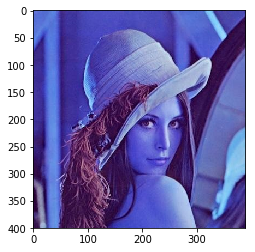

In [4]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('lena.jpg')

plt.imshow(img)

A imagem acima está com as cores erradas, pois o modelo RGB no python é dado por BGR. Para resolver esse problema, devemos transformar a imagem BGR em RGB antes de exibir a imagem

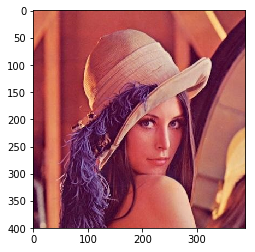

In [13]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('lena.jpg')

plt.imshow(img[:,:,::-1])

In [5]:
import cv2

img = cv2.imread('lena.jpg')

cv2.imshow('titulo da janela',img)

k = cv2.waitKey(0) # a execução do programa fica parada aqui até que o usuário pressione alguma tecla

if k == ord('s'): # se o usuário apertou a tecla ‘s’
    cv2.imwrite('lena2.png',img) # salva a imagem lida no arquivo 'lena2.jpg'
    
cv2.destroyAllWindows()

A variável "img" no código acima é uma matriz. Para ver a dimensão dessa matriz digite:

In [3]:
img.shape

(400, 390, 3)

Para salvar esses valores em variáveis, basta digitar:

In [3]:
M, N, c = img.shape
print('qtde de linhas: ', M)
print('qtde de colunas: ', N)
print('qtde de canais de cores: ', c)

qtde de linhas:  400
qtde de colunas:  390
qtde de canais de cores:  3


A varíavel 'img' tem 400 pixels de altura, 390 pixels de comprimento e 3 canais de cores, pois a imagem lida (lena.jpg) é colorida. Então a variável 'img' são 3 matrizes com dimensão de 400x390 cada uma. Cada matriz representa um canal de cor no modelo RGB. O modelo de cor RGB é o mais utilizado para representar imagens coloridas.
Neste modelo as cores R (red), G (green) e B (blue) são combinadas para formar todas as outras cores.

![alt text](fig1.jpg "Espaço de cor de uma imagem colorida")



No Python, o modelo RGB é representado como BGR, ou seja, a 1° matriz representa o canal Blue, a 2° matriz representa o canal Green e a 3° matriz representa o canal Red.
Para saber qual é o valor do pixel na posição (10,20), por exemplo, devemos digitar o seguinte comando:

In [4]:
azul = img[10,20,0]
verde = img[10,20,1]
vermelho = img[10,20,2]
print("o pixel [10,20] tem os valores: \n R = {} G = {} B = {}".format(verde, azul, vermelho))

o pixel [10,20] tem os valores: 
 R = 109 G = 83 B = 209


Cada pixel tem um valor entre 0 e 255 (estamos trabalhando com imagens de 8 bits). Nas próximas aulas iremos reduzir a quantidade de bits de uma imagem.
O valor 0 significa ausência de cor (preto), e o valor 255 representa o branco.
O valores intermediários entre 0 e 255 representam os níveis-de-cinza.

![alt text](cores.jpg "Níveis-de-cinza")

Para visualizar individualmente as matrizes R, G e B, basta digitar o seguinte comando:

No comando acima, quebramos a variável 'img' em três variáveis que chamamos de R, G e B. Observe que, quando visualizamos as matrizes R, G e B individualmente, a imagem é exibida em nível-de-cinza.

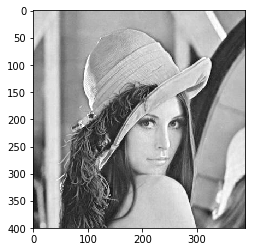

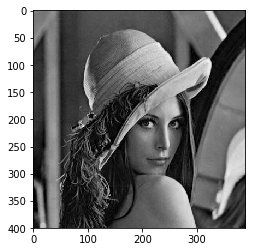

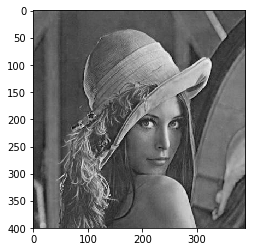

In [14]:
B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]

plt.gray()
plt.imshow(R)
plt.show()
plt.imshow(G)
plt.show()
plt.imshow(B)

Podemos também separar os canais de cores usando a função split do OpenCV:

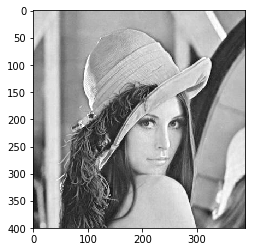

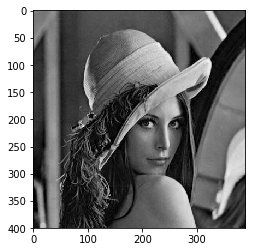

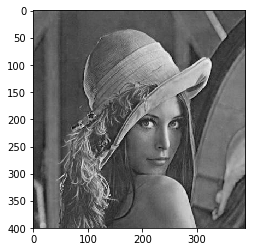

In [10]:
B,G,R = cv2.split(img)

plt.gray()
plt.imshow(R)
plt.show()
plt.imshow(G)
plt.show()
plt.imshow(B)


Suponha que queremos zerar todos os pixels do canal vermelho de uma imagem. Podemos fazer isso da seguinte forma:

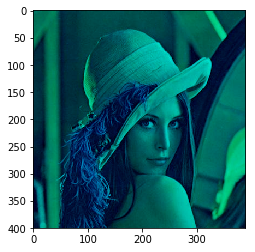

In [11]:
img[:,:,2] = 0
plt.imshow(img[:,:,::-1]) #exibir imagem sem o tom vermelho

Existem três tipos de imagens: imagem binária, imagem colorida e imagem em nível-de-cinza.

![alt text](tipos_imagens.jpg "Tipos de Imagens")

Como transformar uma imagem colorida em uma imagem em nível-de-cinza? Ou seja, como transformar uma imagem representada por N matrizes em apenas 1 matriz.

Existem diversas técnicas para realizar isso. Este é um campo de pesquisa em aberto na área de processamento de imagens.

A técnica mais simples é realizar a média do canais R, G e B
$$ W = (R + G + B)/3$$

133.66666666666669


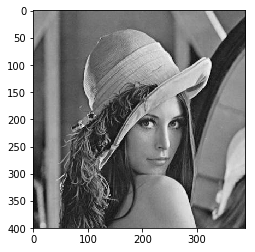

In [18]:
import numpy as np

B,G,R = cv2.split(img)
#W = (B+G+R)/3.0
W = B/3 + G/3 + R/3
print(W[10,20])
plt.imshow(W)


Outra técnica é conhecida como Luminosidade: $$Luminosity = 0.21 × R + 0.72 × G + 0.07 × B $$

128.18


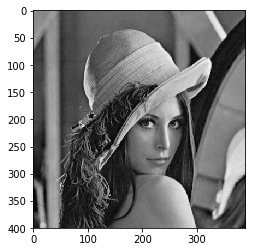

In [19]:
import numpy as np

B,G,R = cv2.split(img)
W = 0.21*R+0.72*G+0.07*B
print(W[10,20])
plt.imshow(W)

Outra técnica é pegar o maior valor dos canais de cores

209.0


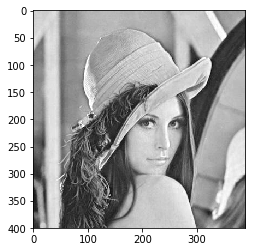

In [20]:
qtdeLinhas, qtdeColunas, c = img.shape
B,G,R = cv2.split(img)
W = np.zeros((qtdeLinhas,qtdeColunas))


for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        m = max(B[i,j],G[i,j],R[i,j])
        W[i,j] = m

print(W[10,20])
plt.imshow(W)

Outro modelo, pegar a média do valor máximo e do valor mínino

146.0


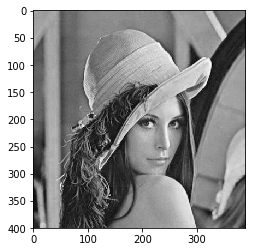

In [26]:
qtdeLinhas, qtdeColunas, c = img.shape
B,G,R = cv2.split(img)
W = np.zeros((qtdeLinhas,qtdeColunas))


for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        Max = max(B[i,j],G[i,j],R[i,j])
        Min = min(B[i,j],G[i,j],R[i,j])
        if( Max != 0 or Min != 0):
            W[i,j] = Max/2.0+Min/2.0
        else:    
            W[i,j] = 0

print(W[10,20])
plt.imshow(W)

Sugestão de leitura: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0029740

In [ ]:
SELECIONANDO ROI (REGION OF INTEREST) 

Escreva um código para exibir só o rosto da lena, como na figura abaixo.


![alt text](rosto_lena.jpg "Rosto da Lena")



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


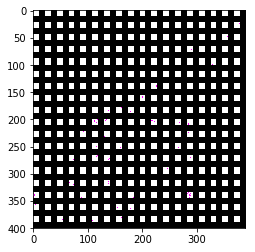

In [35]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('lena.jpg')

qtdeLinhas, qtdeColunas, c = img.shape
B,G,R = cv2.split(img)
W = np.zeros((qtdeLinhas,qtdeColunas,3))


for i in range(0, qtdeLinhas, 2):
    for j in range(0, qtdeColunas, 2):
        W[i,j,0] = B[i,j]
        W[i,j,1] = G[i,j]
        W[i,j,2] = R[i,j]
        


plt.imshow(W)

